# Урок 3. Деревья решений.

Деревья решений - один из наиболее популярных методов классификации. Одной из причин их популярности является то, что окончательную модель крайне легко понять - достаточно построить граф решений и посмотреть, почему был сделан тот или иной прогноз.
$$ $$
Также деревья решений являются основой таких методов как бэггинг, случайные леса и градиентный бустинг, о которых будем говорить позднее.

Например, деревья решений часто используются в банковском скоринге (системе оценки клиентов). Наглядно решение о выдаче кредита заемщику можно представить в таком виде:

![](https://248006.selcdn.ru/public/DS_Block2_M5_final/DT.gif)

По сути, деревьями принятия решений решается задача бинарной классификации (здесь листы решающего дерева могут иметь только два значения: "Выдать кредит" и "Отказать"). Как видно по графу, огромное преимущество деревьев состоит в том, что они легко интерпретируемы: например, в этом примере по схеме можно объяснить, почему было принято решение об отказе в кредите.

Перейдем к алгоритму деревьев решений, реализованному в библиотеке *sklearn* - CART. Его можно использовать как для задач классификации, так и для задач регрессии. Мы сосредоточимся на задаче классификации.

Модель CART представляет собой двоичное дерево - каждый узел может иметь нуль, один или два дочерних узла.

Узел представляет собой точку разделения входных данных, а конечный (терминальный) узел - выходную переменную, которая будет использоваться для прогнозирования.

Посмотрим, как строится такое дерево на упрощенном примере, показывающем выживаемость пассажиров корабля Титаник на основе возраста (age), пола (sex) и наличия супруга и братьев и сестер (sibsp)  на борту.

![](https://248006.selcdn.ru/public/DS_Block2_M5_final/CART_titanic.png)

Десятичные числа под листьями показывают вероятность выживания, а целые - процент наблюдений (от общего количества пассажиров) в листе.

Если со структурой дерева все понятно, то как понять, каким образом лучше разделить выборку данных? Ведь у нас не всегда бинарные признаки  типа "имеется дом" или "не имеется" - в этом наборе данных, например, есть непрерывная переменная "возраст". В этом случае помогут определенные критерии качества разбиения. Обычно в задаче классификации используются энтропия или неопределенность Джини.

По своей сути *энтропия* - это степень хаоса в системе: чем больше различных элементов в множестве, тем выше его энтропия.
В целом, алгоритм подбирает такое разбиение, чтобы минимизировать энтропию, т.е. уменьшить количество объектов разных классов в листе.

Подробнее об энтропии в деревьях принятия решений и представленном примере [здесь](https://habr.com/ru/post/171759/)

Неопределенность Джини можно интерпретировать как вероятность неправильной классификации, если предсказывать классы с вероятностями их появления в этом узле. Соответственно, чем меньше неопределенность Джини, тем более точно работает модель.

На деле минимизация энтропии и неопределенность Джини работают почти одинаково - график энтропии очень близок к графику удвоенной неопределенности Джини, поэтому разница в их использовании будет минимальна.

Теперь вернемся к нашему примеру. Для начала по какому-то заранее определенному критерию (например, энтропии) алгоритм выбирает *начальную точку разбиения входных данных*, рассчитав этот критерий для каждого признака - получает разделение по половому признаку, что очевидно, т.к. разделение по бинарному признаку в самом начале (определение пола) даст больше информации, чем перебор всех возрастов. Переходим к 3-му пункту алгоритма построения дерева - рекурсивному повторению вычислений для каждого получившегося листа.

Далее для одного листа заканчиваем вычисления (возможно, это конечный узел - мы получили нужную вероятность, поэтому дальше вычисления не имеют смысла), а для второго листа вычисляем критерий качества либо для всех возрастов, либо разделяем их на определенные промежутки (например, считаем энтропию через каждые два года, начиная с самого раннего возраста, что упрощает вычисления). Получаем, что лучшее разбиение по критерию качества дает нам *точку разделения данных* для следующего листа 9,5 лет. Далее рекурсивно продолжаем вычисления, пока не получим необходимую информацию.

Подводя итог: шансы на выживание у пассажира были бы больше, если бы он был либо женщиной, либо маленьким мальчиков без большого количества родственников на борту.

В общем виде алгоритм построения дерева можно описать следующим образом:
- вычисляем выбранный критерий качества разбиения для всех элементов исходного множества
- выбираем такое разбиение, при котором критерий качества является наилучшим
- рекурсивно повторяем процедуру для каждого получившегося подмножества

Критерием останова может служить как *энтропия или неопределенность Джини == 0*, так и заранее выбранная максимальная глубина дерева, максимальное количество листов дерева и т.д.

Модель предоставляет возможность варьировать различные гиперпараметры алгоритма, такие как критерий разбиения, максимальная глубина дерева, стратегия разбиения на поддеревья, минимальное количество объектов в листе и т.д. 

Когда мы строим деревья решений, существует большой риск переобучения, так как дерево можно разбить на сколько угодно поддеревьев, которые способны разделять обучающий набор данных вплоть до листов, в которых будет всего один элемент - для предсказаний такие деревья почти бесполезны, так как они слишком точно описывают один тестовый набор данных, в то время как другие данные, которые необходимо классифицировать, могут сильно от него отличаться. В целом, не существует одного правила, которое бы описывало построение любого дерева - в каждом случае критерий останова подбирается индивидуально. Однако можно предложить несколько эвристических правил:
- заранее определенная максимальная глубина дерева (количество узлов одного уровня в дереве - по сути, количество ветвей от первого узла до листа) чревата тем, что будут пропущены важные, но труднообнаруживаемые разбиения, поэтому лучше использовать последующую обрезку дерева, когда сначала строится все дерево решений, а потом по определенным правилам производится его обрезка (например, отсекаются те узлы и ветви, использование которых мало влияет на качество классификации - не сильно уменьшает ошибки);
- разбиение должно быть нетривиальным, т.е. полученные в результате узлы должны сорержать не менее заданного количества объектов - как мы уже отметили,  переобученная на тренировочных данных модель не имеет практической пользы для классификации новых данных;
- если даже усеченные (после обрезки) деревья все еще сложны для восприятия, можно прибегнуть к методике извлечения правил (условий в узлах) из дерева с последующим созданием наборов правил в одном узле.

Мы же ограничимся тем, что построим две модели с критериями качества разбиения, которые рассматривали выше.

По умолчанию алгоритм использует неопределенность Джини.

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [0]:
dtc_model = dtc.fit(x_train, y_train)

Визуализируем граф обученной модели. Для этого понадобится установить библиотеку *graphviz*.

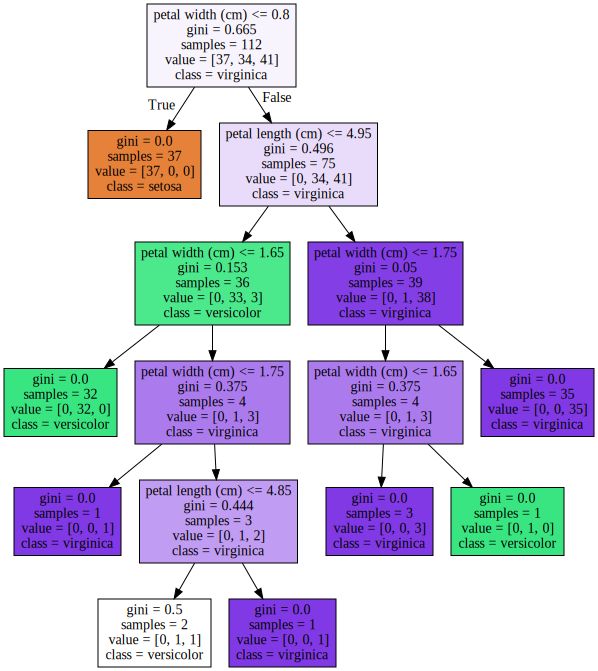

In [0]:
from sklearn import tree
import graphviz

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=iris_dataset.feature_names[2:4],  
                                    class_names=iris_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_model)

Такое дерево читается по цветам: чем больше в узле объектов одного класса, тем насыщенне будет его цвет: как мы видим, при соотношении объектов внутри узла (50:50), цвет узла является чисто белым, а при преобладании объектов какого-либо из классов, он становится ближе к цвету того класса, объектов которого в узле больше. В данном случае почти во всех узлах преобладают цветки класса "virginica".

Но вообще, больше информации мы можем получить, посмотрев на условия разбиения в каждом узле (условия вида x < a).

Получим предсказания для тестовых данных.

In [0]:
dtc_predictions = dtc.predict(x_test)

Для определения точности предсказаний воспользуемся встроенной функцией score.

In [0]:
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


Теперь построим и обучим модель с критерием качества разбиения *энтропия*.

In [0]:
dtc_entrp = DecisionTreeClassifier(criterion='entropy')
dtc_model_entrp = dtc_entrp.fit(x_train, y_train)
dtc_predictions_entrp = dtc_entrp.predict(x_test)
accuracy = dtc_entrp.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


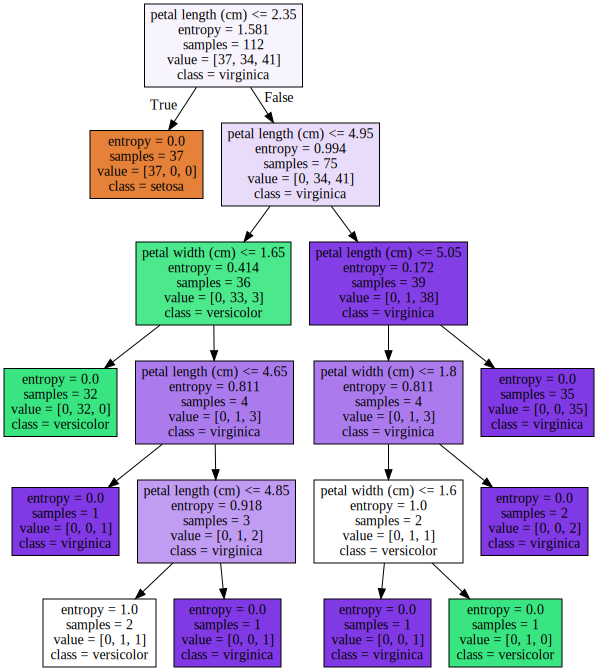

In [0]:
print_graph(dtc_model_entrp)

Как мы можем видеть, при таких параметрах алгоритм работает менее точно, чем kNN и наивный Байес. Можно предположить, что алгоритму не хватает двух признаков для качественного разбиения на поддеревья - на большем количестве данных по каждому объекту метод скорее всего будет работать более точно.

Определенно, деревья решений имеют ряд плюсов: они легко интерпретируемы, визуализируемы (исчезает эффект "черного ящика"), достаточно быстро обучаются и делают прогнозы, имеют небольшое количество параметров модели и поддерживают как категориальные, так и числовые признаки. 

Однако при этом они очень чувствительны к шумам во входных данных, подвержены переобучению - для борьбы с ним необходимо корректно устанавливать гиперпараметры (максимальную глубну дерева или минимальное число элементов в листьях деревьев), а также не умеют предсказывать данные, выходящие за рамки обучающего датасета